# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.
C:\Users\629\.conda\envs\chris_deeplearn\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\629\.conda\envs\chris_deeplearn\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\629\.conda\envs\chris_deeplearn\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\629\.conda\envs\chris_d

In [6]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)= mnist.load_data()
print(x_train_image.shape)
print(x_test_image.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
print(x_Train.shape)
print(x_Test.shape)

(60000, 784)
(10000, 784)


In [10]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255
print(x_Train_normalize)
print(x_Test_normalize)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:

#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#宣告採用序列模型
model = Sequential()

In [16]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [17]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [19]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [20]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 122us/step - loss: 0.2698 - acc: 0.9223 - val_loss: 0.1327 - val_acc: 0.9612
Epoch 2/10
48000/48000 [==============================] - 5s 102us/step - loss: 0.1077 - acc: 0.9679 - val_loss: 0.1041 - val_acc: 0.9682
Epoch 3/10
48000/48000 [==============================] - 5s 102us/step - loss: 0.0713 - acc: 0.9783 - val_loss: 0.0910 - val_acc: 0.9727
Epoch 4/10
48000/48000 [==============================] - 5s 108us/step - loss: 0.0510 - acc: 0.9842 - val_loss: 0.0805 - val_acc: 0.9763
Epoch 5/10
48000/48000 [==============================] - 5s 106us/step - loss: 0.0373 - acc: 0.9882 - val_loss: 0.0805 - val_acc: 0.9758
Epoch 6/10
48000/48000 [==============================] - 5s 112us/step - loss: 0.0261 - acc: 0.9919 - val_loss: 0.0736 - val_acc: 0.9786
Epoch 7/10
48000/48000 [==============================] - 5s 110us/step - loss: 0.0202 - acc: 0.9940 - val_loss: 0.0833 - 

# 以圖形顯示訓練過程

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

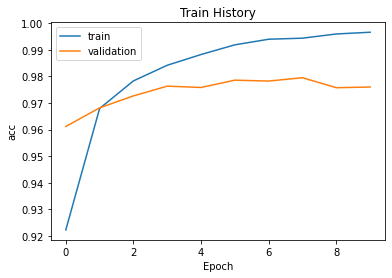

In [24]:
show_train_history(train_history,'acc','val_acc')

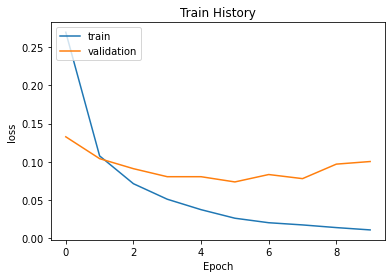

In [23]:

show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [25]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 26us/step

accuracy= 0.9768
